In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Parameters to change depending on patch size

sq_degrees = 10
patch_count = 500
maps_count = 10 # remains same for all patch sizes

## PDFs from FLASK simulated lognormal sky-maps and patches evaluated using treecorr

In [3]:
row_index = 1 # the row_index (corresponds to the row of the treecorr theta_array at which we want to find the PDFs)
bins = 100 # number of bins that will be used in the histograms

In [4]:
mean_del_arr = np.zeros(maps_count*patch_count)
w_arr = np.zeros(maps_count*patch_count)
i_zeta_arr = np.zeros(maps_count*patch_count)

theta = 0
for j in range(maps_count):
    filepath = '../simulations_output/'+str(sq_degrees)+'_sq_degrees_'+str(patch_count)+'_patches/lognormal_map_'+str(j+1)+'/B_treecorr_patches_correlated/'
    theta += np.loadtxt(filepath+'correlation_lognormal_patch_1.txt', usecols=(0,))[row_index]
    for i in range(patch_count):
        mean_del_arr[(j*patch_count)+i] = np.loadtxt(filepath+'correlation_lognormal_patch_'+str(i+1)+'.txt', usecols=(2,))[row_index]
        w_arr[(j*patch_count)+i] = np.loadtxt(filepath+'correlation_lognormal_patch_'+str(i+1)+'.txt', usecols=(1,))[row_index]
        i_zeta_arr[(j*patch_count)+i] = np.loadtxt(filepath+'correlation_lognormal_patch_'+str(i+1)+'.txt', usecols=(4,))[row_index]
        
theta = theta / maps_count

### PDF of mean density fluctuations within patches

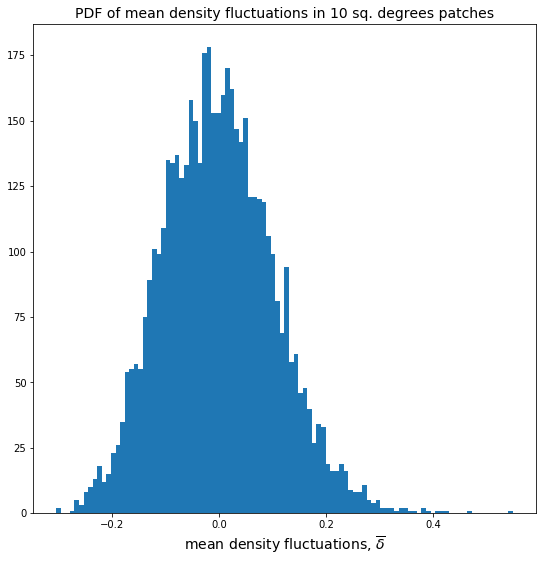

In [5]:
plt.figure(figsize=(9,9))
plt.hist(mean_del_arr, bins=bins)
plt.xlabel('mean density fluctuations, $\overline{\\delta}$', fontsize=14)
plt.title('PDF of mean density fluctuations in '+str(sq_degrees)+' sq. degrees patches', fontsize=14);

### PDF of angular 2-pt function within patches (at a given theta)

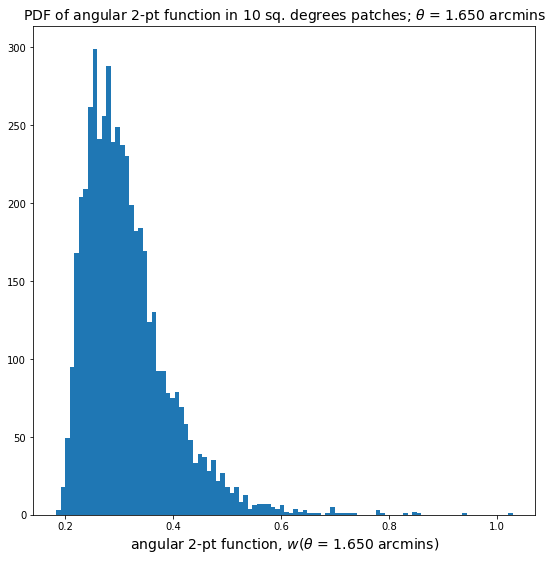

In [6]:
plt.figure(figsize=(9,9))
plt.hist(w_arr, bins=bins)
plt.xlabel('angular 2-pt function, $w$'+'($\\theta$ = {0:4.3f} arcmins)'.format(theta), fontsize=14)
plt.title('PDF of angular 2-pt function in '+str(sq_degrees)+' sq. degrees patches; $\\theta$ = {0:4.3f} arcmins'.format(theta), fontsize=14);

### PDF of integrated 3-pt function within patches (at a given theta)

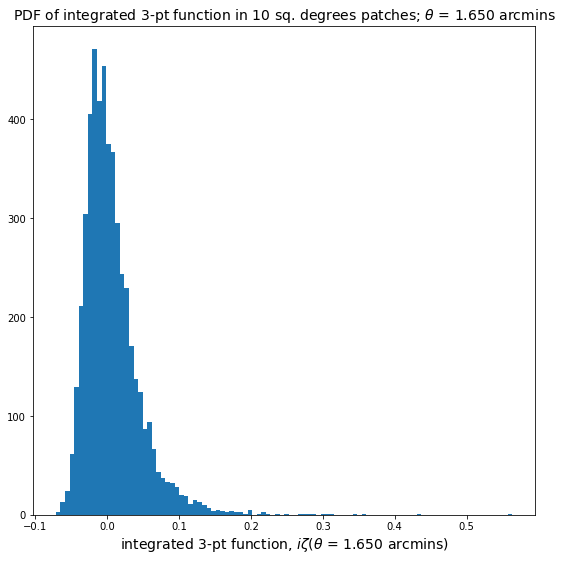

In [7]:
plt.figure(figsize=(9,9))
plt.hist(i_zeta_arr, bins=bins)
plt.xlabel('integrated 3-pt function, $i\\zeta$'+'($\\theta$ = {0:4.3f} arcmins)'.format(theta), fontsize=14)
plt.title('PDF of integrated 3-pt function in '+str(sq_degrees)+' sq. degrees patches; $\\theta$ = {0:4.3f} arcmins'.format(theta), fontsize=14);